# Red Wine Quality 
## By Ariana Hibbard
### Last Edited: May 16, 2021

## Goals

The goal project is primarily to get some practice using numpy and pandas, and use them to produce an interesting exploration of a dataset. 

I am performing an exploratory analysis of the red wine quality dataset. My goal is to get a general summary and overview of the dataset and to surface any interesting features of the dataset. As someone who enjoys the occasional red wine and is intrigued by the chemistry of creating wine, the exploration of this dataset is a good opportunity to explore what makes a good red wine.

## About the dataset
This dataset has a variety of features that describe the quality of red wine samples. The dataset has 1599 rows and contains 12 attributes which are described in the section of this notebook called **Exploratory Analysis of Red Wine Quality**. Of the 12 attributes, 11 attributes are input variables that describe the physical qualities of the wine (e.g. PH values) and the output is a wine quality rating between 0 (very bad) and 10 (very excellent). The quality value assigned to each wine was determined by a median of at least 3 evaluations made by wine experts. Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). The [Wine Quality dataset abstract](https://archive.ics.uci.edu/ml/datasets/wine+quality) from UCI states that there are more normal-rated wines in this dataset than wines rated excellent or poor. It might be an interesting machine learning task to attempt to detect when a wine is rate excellent or poor.

A link to a summary of information about the data set used can be found here: https://archive.ics.uci.edu/ml/datasets/wine+quality

The link to download the datasets can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/.

## Data Set Citation

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
  
## Citations
Monro, Tanya M et al. “Sensing free sulfur dioxide in wine.” Sensors (Basel, Switzerland) vol. 12,8 (2012): 10759-73. doi:10.3390/s120810759


# The Physical Qualities of Wine

The data set has 12 variables. The variables are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. The following is some brief background on each physical quality and how they may affect the taste and quality of wine. 

### Fixed Acidity
Fixed acidity relates to acids in wines that do not evaporate readily. 

### Volatile Acidity
According to this [Decanter article](https://www.decanter.com/learn/volatile-acidity-va-45532/), volatile acidity refers to the acids in a wine that are gaseous, rather than liquid. This means that these acids can be sensed as smell. At lower levels, volatile acidity can give wine a sweet, fruity smell (like cherry, raspberry and passion fruit) but too much volatile acidity can cause wine to go bad and it can smell like nail polish remover or vinegar according to this [Wine Folly article](https://winefolly.com/deep-dive/weird-wine-flavors-and-the-science-behind-them/). 

### Citric Acid
Citric acid is often added in wines to increase acidity or complement a specific flavor. Too much citric acid can contribute to increased volatile acidity. Read more about citric in acid in this brief description of citric acid from [UCI Davis](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid).

### Residual Sugar
According to this [Wine Folly website article](https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/) on residual sugar, residual sugar is form the natural grape sugars that are leftover in a wine after the alcoholic fermentation finishes. It affects the sweetness of the wine.

### Chlorides
Chlorides have been cited as a potential compound found in certain wines that may give wines a salty flavor [(Coli, et al.)](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095).

### Free Sulfur Dioxide
Free sulfure dioxide in wine aids in preventing microbial growth and the oxidation of wine ([Monro](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3472855/)). Too much free sulfur dioxide can mask a wine's fruit aromas [Source](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too). Additionally, according to [this article](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too), too much free sulfur dioxide may actually affect the taste of wine to the consumer. 

### Total Sulfur Dioxide
Represents the portion of sulfur dioxide that is free in wine and also bound to other chemicals in the wine such as aldehydes, pigments , or sugars. [Source](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too). 

### Density
Density is the mass per volume of a wine. The density of wine can be measured using various techniques as described by the [Australian Wine Research Institute](https://www.awri.com.au/industry_support/winemaking_resources/laboratory_methods/chemical/density/). 
### pH
In chemistry, pH is a quality used to measure the relative acidity or alkalinity of a liquid. Values for pH can range from 0 - 14. A pH value of 7 is a neutral substance like water. Lower than 7 means the substance is more acidic and higher than 7 means a substance is basic. According to a [Wine Spectator article](https://www.winespectator.com/articles/what-do-ph-and-ta-numbers-mean-to-a-wine-5035#:~:text=Winemakers%20use%20pH%20as%20a,3.6%20is%20best%20for%20reds.), winemakers will use pH "as a way to measure ripeness in relation to acidity". According to the article, "low pH wines will taste tart and crisp, while higher pH wines are susceptible to bacterial growth". A pH value of 3.3 - 3.6 is ideal for red wines.

### Sulphates
I am assuming that the characteristic referred to as sulphates in the data set represents the presence of sulfites in wine. According to a [Wine Spectator article](https://www.winespectator.com/articles/difference-between-sulfites-sulfates-wine-54706), are a naturally occurring compound in wine that act as a preservative. Sulfites in wine inhibit microbial growth. According to a [Wine Cooler Direct article](https://learn.winecoolerdirect.com/wine-sulfites/), wine producers agree that very high amounts of sulfites can affect the taste of wine, but low amounts can actually preserve the flavors. The typical amount of sulfites in red wine is about 40 to 50 PPM. 

### Alcohol
According to a [Binwise article](https://home.binwise.com/blog/wine-alcohol-content) on wine alcohol content, the alcohol content of red wine typically falls between 12% and 15%, with the average of 13.5% ABV. The grapes that make up red wine have more sugar than the grapes in white wine, which means the fermentation process for red wine will lead to a higher concentration of alcohol.

According to this [Orange Coast Winery article](https://www.orangecoastwinery.com/blog/Wine-Alcohol-Content--How-it-Changes-What-You-Taste), experts say that alcohol doesn't trigger receptors on our tongue, so alcohol alone will not affect the taste. However, alcohol helps our nose smell the aroma of the wine. According to Orange Coast Winery, a general rule of thumb is the bolder and sweeter the taste, the higher the alcohol content. An article on the [FoodPairing blog](https://blog.foodpairing.com/2016/01/alcohol-how-does-it-effect-the-flavor-of-your-drink/) also has some interesting science on alcohol's influence on the taste of wine.

### Quality
The quality rating given to each wine was a median based on the evaluation of 3 different wine experts. Wine experts could rate a wine from 0 (very bad) to 10 (very excellent). This characteristic will be the primary characteristic I will look at to see how it was potentially influenced by the other 11 characteristics in the dataset.

# Initial Analysis

In [2]:
import numpy as np
import pandas as pd

# load in the data
wine_data = pd.read_csv('winequality-red.csv',sep=';')

wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
num_rows = len(wine_data.index)
print("Number of instances: ", num_rows)

Number of instances:  1599


The lines of code above are used to import numpy and pandas and read in the red wine quality dataset for processing. They also calculate the number of rows available in the dataset. There are 1599 rows. 

The following is a summary of the quality column. The quality column describes what rating in quality a wine has been given by various wine reviewers. For each row in the dataset, the quality provided is an average of the quality ratings from at least 3 wine reviewers. In the dataset, the wine quality only occurs as integers. 

In [4]:
'''
Displays a simple table describing the summary of the given attribute columns.
params
 dataset: Pandas DataFrame that contains the dataset
 attribute: String containing the name of the attribute
'''
def display_attribute_summary(dataset,attribute):
    print(attribute, "summary")
    print("----------------------")
    print(dataset[attribute].describe())
    print()
    
display_attribute_summary(wine_data,"quality")

quality summary
----------------------
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64



The mean wine quality is 5.636. This quality makes sense for the given dataset because the dataset abstract provided by UCI stated that "normal" qualities for wine were more common than qualities that were poor or excellent. This is also reflected in the min and max values found in the dataset, 3 and 8 respectively. The range of qualities for red wine is relatively small in comparison to the potential values (0 through 10). This perhaps indiciates that wine reviewers were less likely to rate a wine as "very bad" or "excellent" and may have tended to stay close to average ratings for wine. 

Below are some summary data points for other variables in the wine data set. The characteristics I chose to include are: fixed acidity, volatile acidity, citric acid, and total sulfur dioxide summary. I chose these summaries because I identified them as physical properties of wine that may affect the overall taste. 

Acids can contribute greatly to the taste of a wine [according to this article on fixed acidity from UCI](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). According to UCI, wines lacking in acidity are considered "flat". The acidity of the wine may affect the quality and taste. I also chose to display the free sulfur dioxide summary because according to [this article](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too), too much free sulfur dioxide may actually affect the taste of wine to the consumer. 

In [5]:
display_attribute_summary(wine_data,"fixed acidity")
display_attribute_summary(wine_data,"volatile acidity")
display_attribute_summary(wine_data,"citric acid")
display_attribute_summary(wine_data,"pH")
display_attribute_summary(wine_data,"free sulfur dioxide")

fixed acidity summary
----------------------
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

volatile acidity summary
----------------------
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

citric acid summary
----------------------
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

pH summary
----------------------
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

free sulfur dioxide 

The following functions below create groups to plot the count of wines organized by quality values. Since the quality values are discrete values, I chose a bar chart to show the number of wines with each given rating.

3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


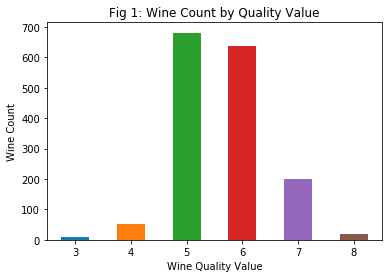

In [15]:
# calculating number of wines with each rating
import matplotlib.pyplot as plt

'''
Gets number of wines with each quality value and returns a series with quality value and counts.
No params
'''
def get_wine_count_by_quality():
    num_wines_by_quality = {}

    # choose range 3 to 8 for the qualities in the wine
    for i in range(3,9):
        # check if the row has the current quality value
        qual_series_obj = wine_data.apply(lambda x: True if x['quality'] == i else False, axis=1)
    
        # get the number of rows with quality value = i
        num_of_rows = len(wine_data[qual_series_obj == True].index)
        num_wines_by_quality[i] = num_of_rows

    num_wines_by_quality_series = pd.Series(num_wines_by_quality)
    return num_wines_by_quality_series

'''
Plots the number of wines with a particular value rating. 
No params
'''
def plot_wine_count_by_quality():
    wine_count_by_quality_ser = get_wine_count_by_quality()
    ax = wine_count_by_quality_ser.plot.bar(rot=0)
    plt.title("Fig 1: Wine Count by Quality Value")
    plt.xlabel("Wine Quality Value")
    plt.ylabel("Wine Count")
    #plt.close()
    
print(get_wine_count_by_quality())

plot_wine_count_by_quality()

Figure 1: Wine Count by Quality Value shows the number of wines with a given quality rating. The quality value can be any value between 0 and 10, but the observed values for the minimum and maximum were 3 and 8, as shown in the summary of the quality column. The most frequent quality values were 5 and 6. The frequency of those quality is supported by  the calculated mean and median for wine quality. One can see that 5, 6, and 7 were the most popular ratings.

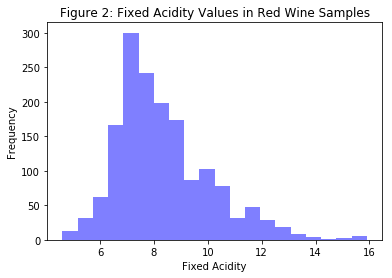

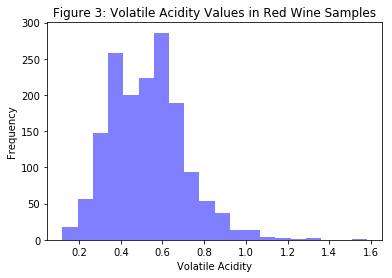

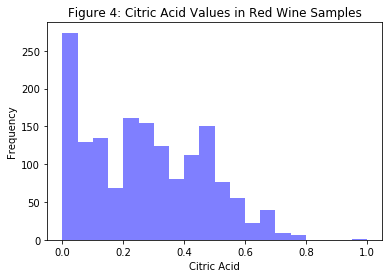

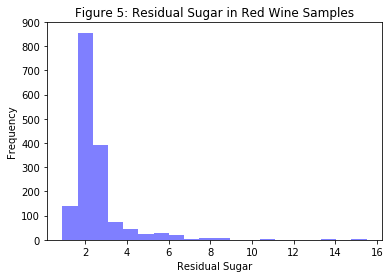

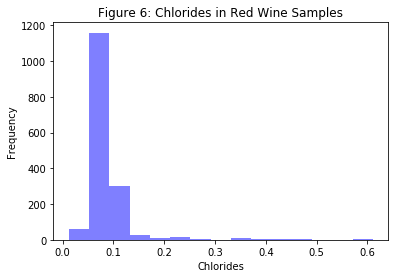

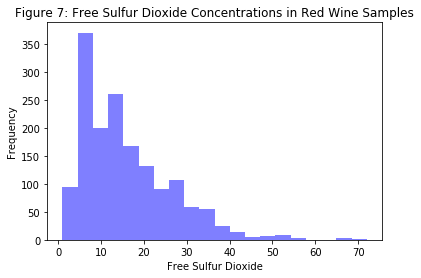

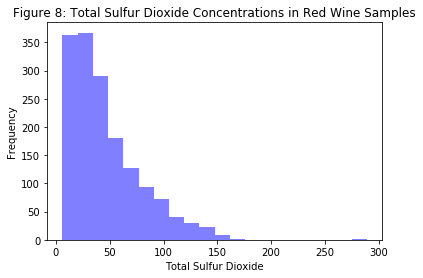

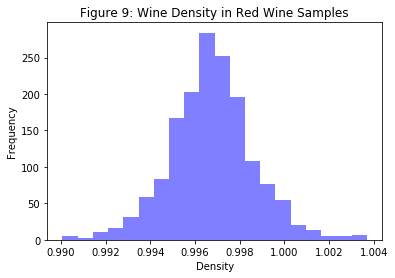

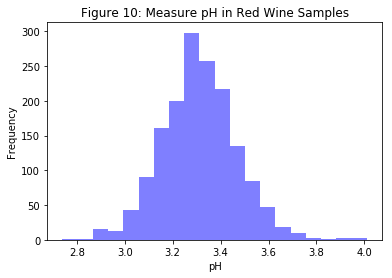

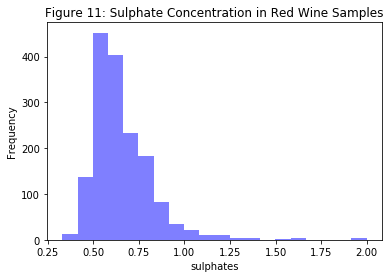

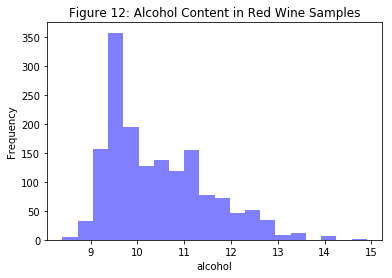

In [7]:
'''
Plots a histogram for a given dataset.
params
 num_bins: integer number of bins for the histogram chart
 dataset: pandas DataFrame containing the dataset
 x_label: string for the label that should go on the x-axis
 y_label: string for the label on the y-axis
 title: string describing the title of the plot
'''
def plot_histogram(num_bins,dataset,x_label,y_label,title):
    # the histogram of the data
    n, bins, patches = plt.hist(dataset, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_histogram(20,wine_data["fixed acidity"],"Fixed Acidity","Frequency","Figure 2: Fixed Acidity Values in Red Wine Samples")
plot_histogram(20,wine_data["volatile acidity"],"Volatile Acidity","Frequency","Figure 3: Volatile Acidity Values in Red Wine Samples")
plot_histogram(20,wine_data["citric acid"],"Citric Acid","Frequency","Figure 4: Citric Acid Values in Red Wine Samples")
plot_histogram(20,wine_data["residual sugar"], "Residual Sugar", "Frequency", "Figure 5: Residual Sugar in Red Wine Samples")
plot_histogram(15,wine_data["chlorides"], "Chlorides", "Frequency", "Figure 6: Chlorides in Red Wine Samples")
plot_histogram(20,wine_data["free sulfur dioxide"],"Free Sulfur Dioxide", "Frequency", "Figure 7: Free Sulfur Dioxide Concentrations in Red Wine Samples")
plot_histogram(20,wine_data["total sulfur dioxide"],"Total Sulfur Dioxide","Frequency","Figure 8: Total Sulfur Dioxide Concentrations in Red Wine Samples")
plot_histogram(20,wine_data["density"],"Density","Frequency","Figure 9: Wine Density in Red Wine Samples")
plot_histogram(20,wine_data["pH"],"pH","Frequency","Figure 10: Measure pH in Red Wine Samples")
plot_histogram(20,wine_data["sulphates"],"sulphates","Frequency","Figure 11: Sulphate Concentration in Red Wine Samples")
plot_histogram(20,wine_data["alcohol"],"alcohol","Frequency","Figure 12: Alcohol Content in Red Wine Samples")

Figures 2 through 12 show the distribution of frequencies of values for various qualities of wine. 

Figure 9: Wine Density in Red Wine Samples and Figure 10: Measure pH in Red Wine Samples both show fairly normal distribution shapes. Figure 10 supports what we know about the ideal range of pH values in red wine being 3.3 - 3.6. As we can see in Figure 10, the most common pH in the red wine samples was around 3.3, with an overall greater number of wine samples falling between 3.3 and 3.6.

Because the acidity of a wine can contribute to the overall taste of the wine, Figure 2: Histogram of Fixed Acidity Values shows the overall distribution of values for the fixed acidity of wine. 

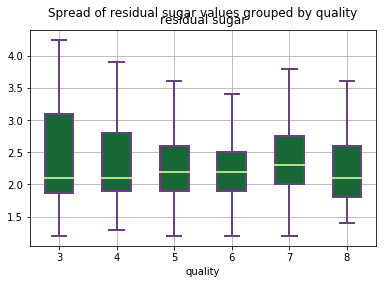

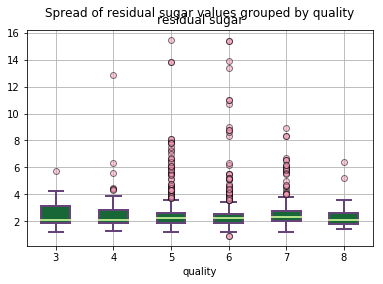

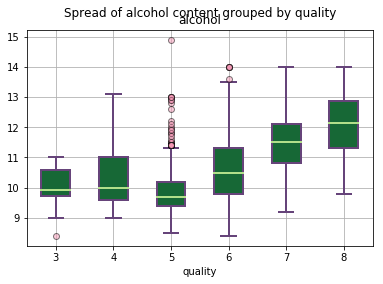

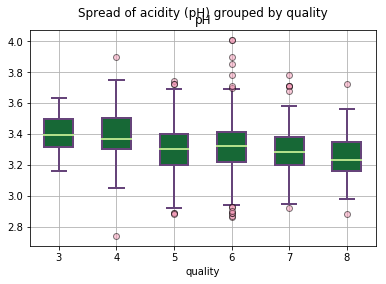

In [8]:
'''
Draws a box and whisker plot for the given pandas DataFrame.
params:
df: pandas DataFrame containing the dataset to draw a plot for
column_prop: list containing the column(s) containing the property whose spread will be shown on the plot
group_by_prop: string value with the quality the box and whisker plots will be grouped by
showfliers: boolean value determining if outliers will be plotted on the graph
'''
def draw_box_whisker_plot(df,column_prop,group_by_prop,showfliers, title):
    bp = df.boxplot(column=column_prop,by=group_by_prop, patch_artist=True,return_type='dict',showfliers=showfliers)

    # hide the grouped by title
    plt.suptitle(title)
    for key in bp.keys():
        # change outline color
        [box.set(color='#66447a',linewidth=2) for box in bp[key]['boxes']]
        # change fill color
        [box.set(facecolor='#176836') for box in bp[key]['boxes']]
        # change whisker color
        [whisker.set(color='#66447a', linewidth=2) for whisker in bp[key]['whiskers']]
        # change cap color
        [cap.set(color='#66447a', linewidth=2) for cap in bp[key]['caps']]
        # change median line color
        [median.set(color='#b2df8a', linewidth=2) for median in bp[key]['medians']]
        
        # set outlier flier color
        [flier.set(marker='o', markerfacecolor='#f596b5', alpha=0.5) for flier in bp[key]['fliers']]
        
        
draw_box_whisker_plot(wine_data,['residual sugar'],'quality',False, "Spread of residual sugar values grouped by quality")
draw_box_whisker_plot(wine_data,['residual sugar'],'quality',True, "Spread of residual sugar values grouped by quality")
draw_box_whisker_plot(wine_data,['alcohol'],'quality',True, "Spread of alcohol content grouped by quality")
draw_box_whisker_plot(wine_data,['pH'],'quality',True, "Spread of acidity (pH) grouped by quality")

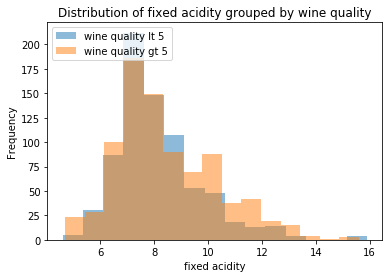

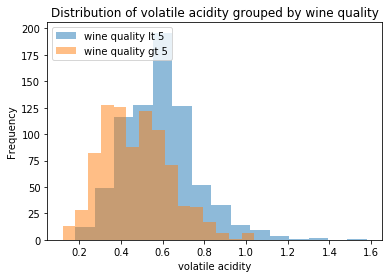

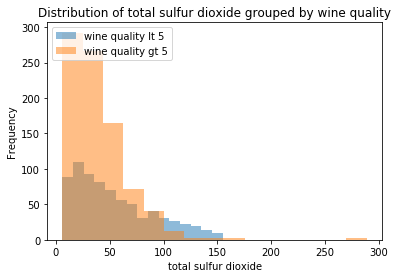

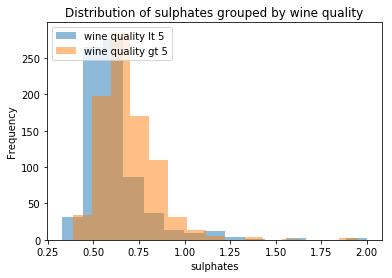

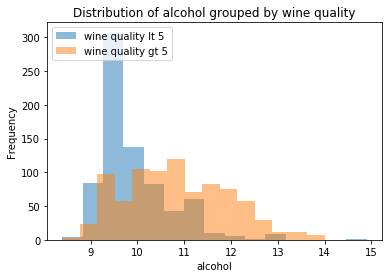

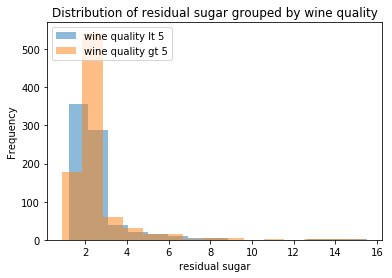

In [9]:
def plot_two_histograms(attribute,bins):
    # object. to check if the quality is greater than 5
    quality_gt_5 = wine_data.apply(lambda x: True if x['quality'] > 5 else False, axis=1)

    quality_lt_5 = wine_data.apply(lambda x: True if x['quality'] <= 5 else False, axis=1)
    
    a = wine_data[quality_lt_5 == True]
    b = wine_data[quality_gt_5 == True]
    #bins = np.linspace(-10, 20, 50)
    
    plt.hist(a[attribute], bins, alpha = 0.5, label='wine quality lt 5')
    plt.hist(b[attribute], bins, alpha = 0.5, label='wine quality gt 5')
    plt.legend(loc='upper left')
    title = "Distribution of " + attribute + " grouped by wine quality"
    plt.title(title)
    plt.xlabel(attribute)
    plt.ylabel("Frequency")
    plt.show()

plot_two_histograms("fixed acidity", 15)
plot_two_histograms("volatile acidity", 15)
plot_two_histograms("total sulfur dioxide", 15)
plot_two_histograms("sulphates", 15)
plot_two_histograms("alcohol", 15)
plot_two_histograms("residual sugar", 15)

 
-0.5078 x + 0.6654
 
0.05567 x + 1.959
 
2.1 x + 13.14
 
-0.4295 x + 3.427


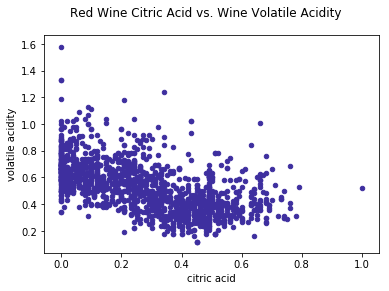

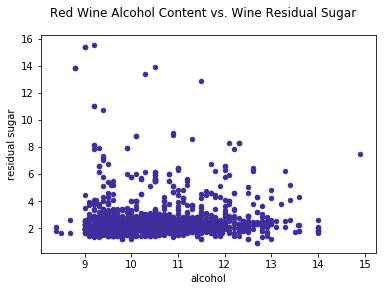

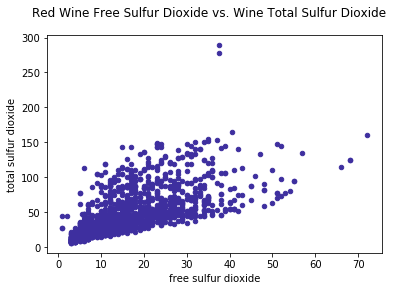

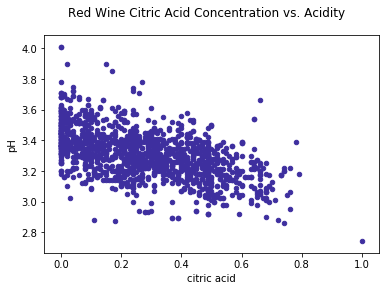

In [18]:
'''
Draws a scatter plot for the given pandas DataFrame.
params:
df: pandas DataFrame containing the dataset to draw a plot for
x_val: string value describing characteristic to plot along the x-axis
y_val: string value describing characteristic to plot along the y-axis
'''
def plot_scatterplot(df, x_val, y_val, title):
    sp = df.plot.scatter(x=x_val, y=y_val, c="#3E2F9F")
    d = np.polyfit(df[x_val],df[y_val],1)
    f = np.poly1d(d)
    print(f)
    #df.insert(6,’Treg’,f(july[‘Yr’]))
    plt.suptitle(title)

plot_scatterplot(wine_data, "citric acid","volatile acidity","Red Wine Citric Acid vs. Wine Volatile Acidity")
plot_scatterplot(wine_data, "alcohol","residual sugar","Red Wine Alcohol Content vs. Wine Residual Sugar")
plot_scatterplot(wine_data, "free sulfur dioxide","total sulfur dioxide","Red Wine Free Sulfur Dioxide vs. Wine Total Sulfur Dioxide")
plot_scatterplot(wine_data, "citric acid","pH","Red Wine Citric Acid Concentration vs. Acidity")